#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

# Data that are given by the task

ω1: no stress, 
ω2: stress


P(ω1) = 7/12, 
P(ω2) = 5/12

# **Part A**
#### Given pdf: p(x|theta) = (1/pi) * (1 / (1 + (x-theta)^2))

# **Task A.1**
## Data: 

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

D1 is referring to ω1 class and D2 is referring to ω2 

Estimation of theta1: 2.5999999999875456
Estimation of theta2: -3.1600000000113084


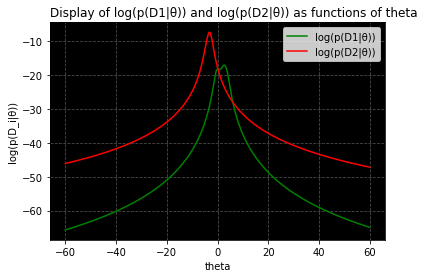

In [37]:
#A-priori probabilities
P_apriori1 = 7/12
P_apriori2 = 5/12

#Data for ω1
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

#Data for ω2
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

theta = np.arange(-60, 60, 0.01)

#Task A1
p1 = 1
p2 = 1

#Calculating L(θ)
for x in D1:
    p1 *= (1/math.pi)*(1/(1+(x-theta)**2))

for x in D2:
    p2 *= (1/math.pi)*(1/(1+(x-theta)**2))

L1 = np.log(p1)
L2 = np.log(p2)
# print(L1)
# print(L2)
# print(np.amax(L1))
# print(max(L2))
# print(type(L1))

theta1 = theta[L1.argmax()]
print(f"Estimation of theta1: {theta1}")

theta2 = theta[L2.argmax()]
print(f"Estimation of theta2: {theta2}")

ax = plt.axes()
ax.set_facecolor("black")
plt.plot(theta,L1, color="green")
plt.plot(theta,L2, color="red")
plt.title("Display of log(p(D1|θ)) and log(p(D2|θ)) as functions of theta", loc="left")
plt.xlabel("theta")
plt.ylabel("log(p(D_i|θ))")
plt.legend(["log(p(D1|θ))", "log(p(D2|θ))"])
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task A.2**

discrimination function: g(x) = log(P(x|theta1)) - log(P(x|theta2)) + logP(ω1) - logP(ω2)

where X = D1 U D2 (?)

g is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073, -2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 12
g1 is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073] and is size of 7
g2 is [-2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 5


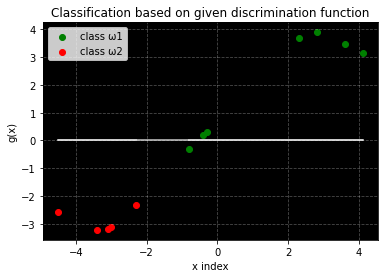

In [4]:
#Index X = D1 U D2
X = D1 + D2

#Discrimination Function g
g = list()

#g = g1 - g2
g1 = list()
g2 = list()

for x in X:
    temp = (np.log((1/math.pi)*(1/(1+(x-theta1)**2))) - np.log((1/math.pi)*(1/(1+(x-theta2)**2)))) + (np.log(P_apriori1) - np.log(P_apriori2))
    g.append(temp)

#g1 and g2 generated from g
g1 = g[:len(D1)]
g2 = g[len(D1):]

print(f"g is {g} and is size of {np.size(g)}")
print(f"g1 is {g1} and is size of {np.size(g1)}")
print(f"g2 is {g2} and is size of {np.size(g2)}")
discrimination_line = [0 for _ in range(len(X))]

#Need to implement subplots if wanted the second one
#Classification and visualisation
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, g1, color="green")
plt.scatter(D2, g2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

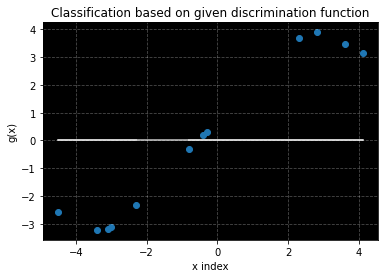

In [5]:
#Just classification
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(X, g)
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Part B**

# **Useful functions**

In [6]:
# ***Function for plotting into subplots at the same figure***
#_____________________________________________________________
# fig: the figure in which will be done the plotting
# figx: number of subplot placeholders on the x axis
# figy: number of subplot placeholders on the y axis
# fig_no: the place where the plot will be putted
# title: the title of the plot
# x_label: the label for the x axis of the plot
# y_label: the label for the y axis of the plot
# x: values for the x axis
# y: values for the y axis
#_____________________________________________________________
# There are some changes to the background color and the type of the grid too. But those changes are not to be changed by given arguments
def vizualize(fig, figx, figy, fig_no, title, x_label, y_label, x, y):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    plt.legend(loc = "lower right")

# ***Same as the previous function but for more that one plots at the same subplot***
#________________________________________________________________
# y: a list of numpy arrays
#________________________________________________________________
def vizualize_more(fig, figx, figy, fig_no, title, x_label, y_label, x, y):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i in range(len(y)):
        plt.plot(x, y[i])
    plt.legend(loc = "lower right")

Prior probability density function for θ


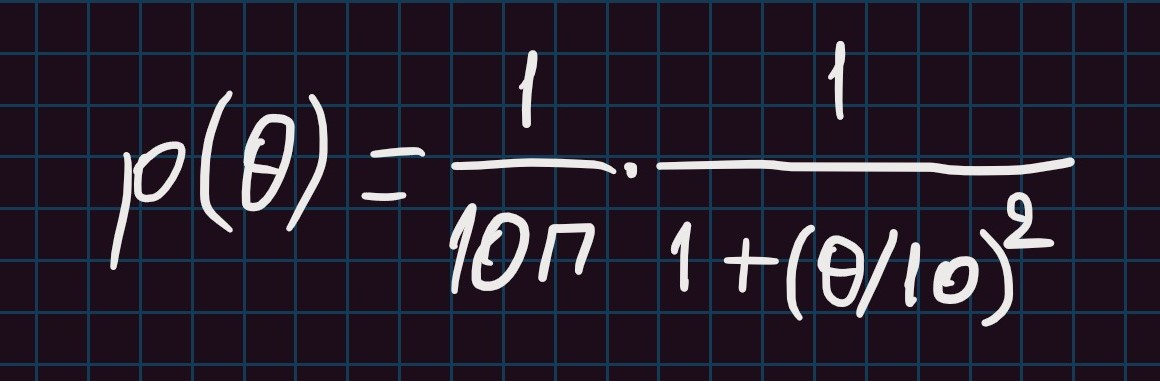

In [7]:
print("Prior probability density function for θ")
display.Image("Part_B.jpg")

___The θ values:___
[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]

___The pdf values:___
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]

___The plot of the pdf:___


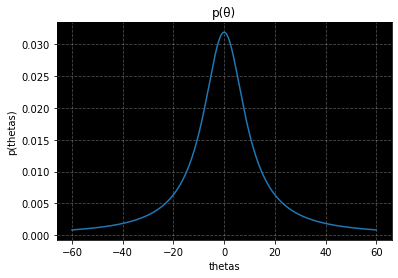

In [8]:
# Prior probability density function for θ based on the task's given data
begin = -60
end = 60
step = 0.01
theta = np.arange(begin, end, step)
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))

# Print θ and pdf values to be sure
print("___The θ values:___")
print(theta)
print("")
print("___The pdf values:___")
print(p_theta)
print("")

# Plot the pdf
print("___The plot of the pdf:___")
ax = plt.axes()
ax.set_facecolor("black")
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta)
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task B.1**

> Computation of `p(θ|D1) and p(θ|D2)`

Prior probability density function for θ


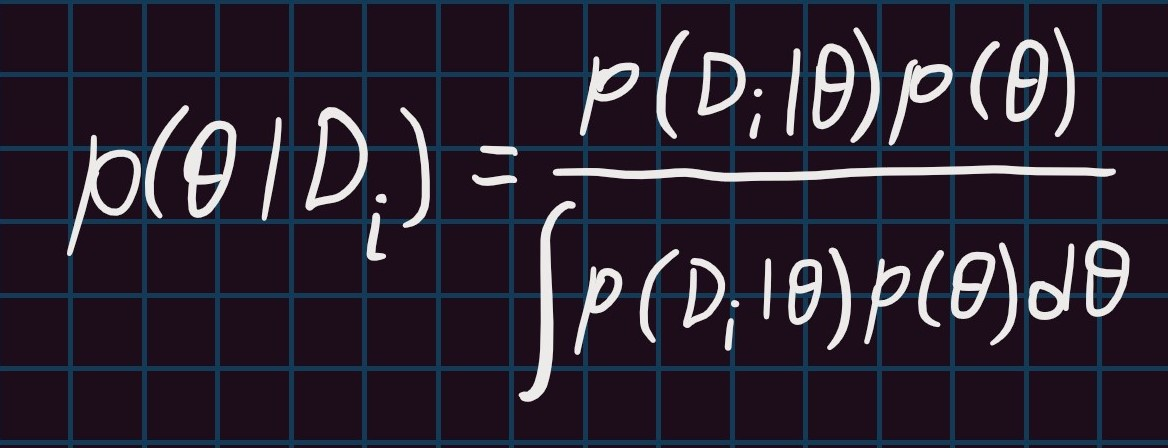

In [9]:
print("Prior probability density function for θ")
display.Image("p_theta_D.jpg")

# **Useful custom functions**

> `p(θ|Di)` function implementation

In [16]:
# p(θ|Di) function for better code usability
#____________________________________________
# 
#____________________________________________
def p_theta_Di(p, p_theta, step):
    # Multiplication computation for both the denominator and the numerator
    numerator = np.multiply(p, p_theta)
    # Integral computation (Approximation using sum and the rule of the trapezoid)
    integral = 0
    for i in range(1, numerator.size):
        integral += ((numerator[i] + numerator[i-1]) * step) / 2
    # p(θ|D_i) computation
    p_theta_D = numerator/integral
    return p_theta_D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


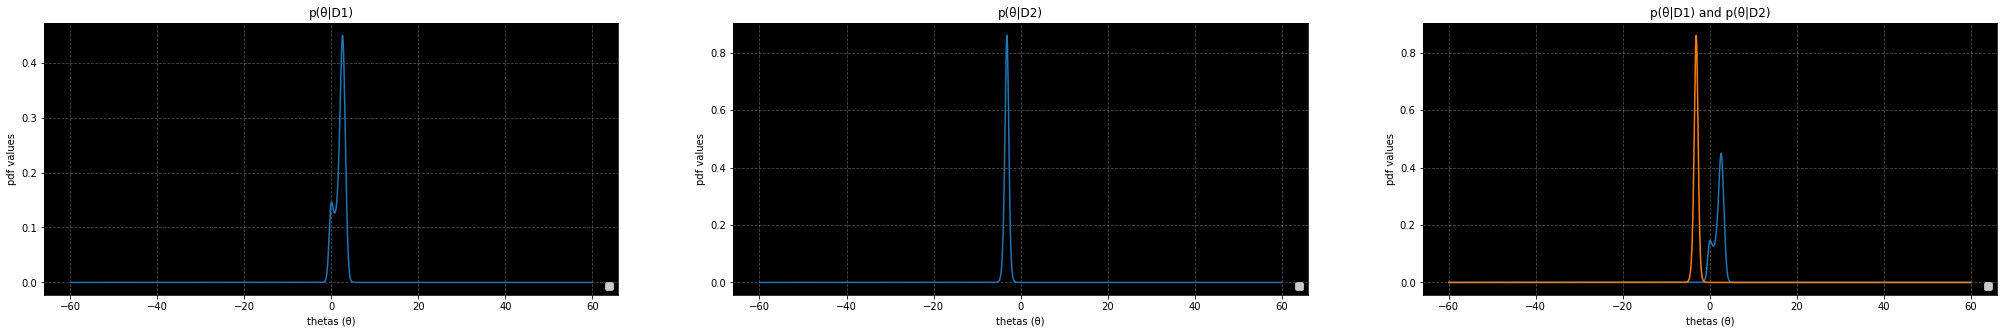

In [18]:
# p(D_i|θ) exists because of task A.1
# p(θ) has been computed at the beginning of task B
# To compute the p(θ|Di) we use the custom made function above
p_theta_D1 = p_theta_Di(p1, p_theta, step)
p_theta_D2 = p_theta_Di(p2, p_theta, step)


# Plot the computed pdfs
# prepare the figure
fig = plt.figure(figsize=(35, 5))
title1 = "p(θ|D1)"
title2 = "p(θ|D2)"
title3 = "p(θ|D1) and p(θ|D2)"
x_label = "thetas (θ)"
y_label = "pdf values"
# plot separately
# we will have 3 subplots
vizualize(fig, 3, 1, 1, title1, x_label, y_label, theta, p_theta_D1)
vizualize(fig, 3, 1, 2, title2, x_label, y_label, theta, p_theta_D2)
combine_list = [p_theta_D1, p_theta_D2]
vizualize_more(fig, 3, 1, 3, title3, x_label, y_label, theta, combine_list)
# Show all plots
plt.show()

# **Task B.2**

> `Predict` function implementation

Predict function


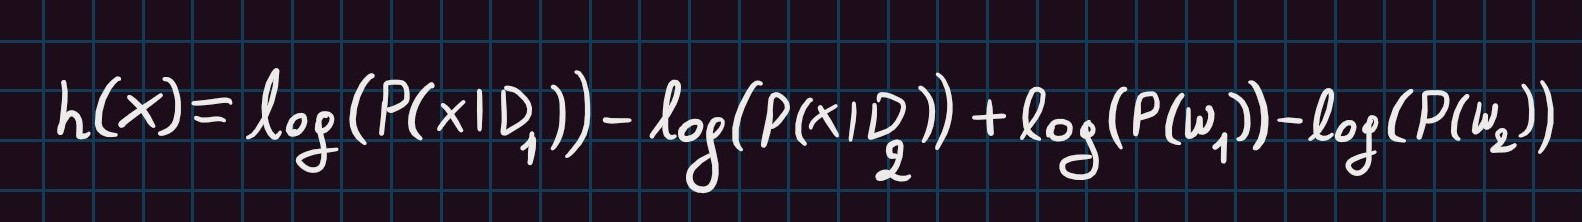

In [12]:
print("Predict function")
display.Image("predict.jpg")

p(x|Di) function


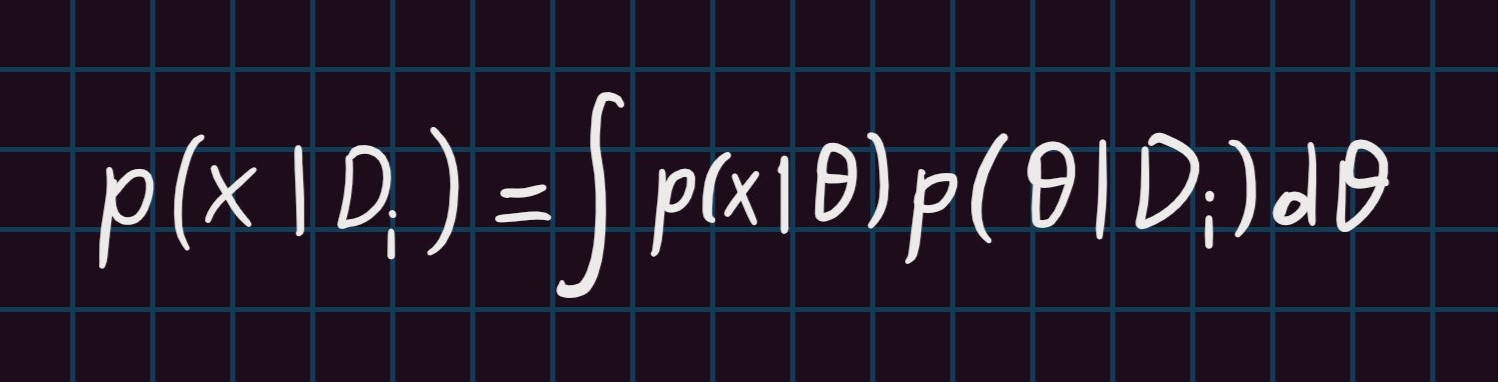

In [13]:
print("p(x|Di) function")
display.Image("predict2.jpg")

# **Useful custom functions**

> `p(x|θ)` function implementation  
> `p(x|D)` function implementation  
> `predict` function implementation

In [33]:
# p(x|θ) function for better code usability
#____________________________________________
# x: the x value
# theta: the theta value
#____________________________________________
def p_x_theta(x, theta):
    return ((1/math.pi) * (1/(1 + (x - theta) ** 2)))

# p(x|D) function for better code usability
#____________________________________________
#
#____________________________________________
def p_x_Di(x, theta, step, p, p_theta):
    ret = []
    for i in range():
        
        ret.append()
    return ret

# predict function declaration and implementation
#________________________________________________
#
#________________________________________________
def predict(x, theta):
    return 0

# **Applying and plotting**